In [1]:
import pandas as pd
import numpy as np
import yfinance as yfin
import pandas_datareader as pdr
from random import gauss
import matplotlib.pyplot as plt
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import math
import seaborn as sns
from statsmodels.stats.diagnostic import acorr_ljungbox
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
sns.set()

In [2]:
start_date = pd.to_datetime('2010-01-01')
end_date = pd.to_datetime('2020-10-11')

In [3]:
aapl= pdr.data.get_data_yahoo('AAPL',start_date,end_date)

In [4]:
type(aapl)

pandas.core.frame.DataFrame

In [5]:
aapl.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,7.619643,7.520000,7.611786,7.526072,352410800.0,6.503574
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.604801
2010-01-05,7.699643,7.616071,7.664286,7.656428,601904800.0,6.616219
2010-01-06,7.686786,7.526786,7.656428,7.534643,552160000.0,6.510980
2010-01-07,7.571429,7.466072,7.562500,7.520714,477131200.0,6.498945


In [6]:
aapl['return']= (aapl['Adj Close'].shift(1)/aapl['Adj Close']).apply(math.log)

In [7]:
aapl.head()

,High,Low,Open,Close,Volume,Adj Close,return
Date,,,,,,,
2009-12-31,7.619643,7.520000,7.611786,7.526072,352410800.0,6.503574,NaN
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.604801,-0.015445
2010-01-05,7.699643,7.616071,7.664286,7.656428,601904800.0,6.616219,-0.001727
2010-01-06,7.686786,7.526786,7.656428,7.534643,552160000.0,6.510980,0.016034
2010-01-07,7.571429,7.466072,7.562500,7.520714,477131200.0,6.498945,0.001850


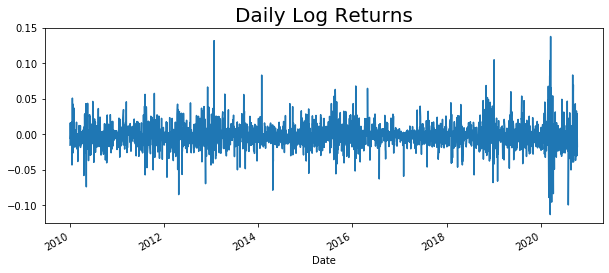

In [8]:
plt.figure(figsize=(10,4))
aapl['return'].plot()
plt.title('Daily Log Returns', fontsize=20)
plt.show()

In [9]:
# Clearly, we see that the volatility bursts do exist and it is not constant over time

In [10]:
#Now we look at the ACFs, PACFs

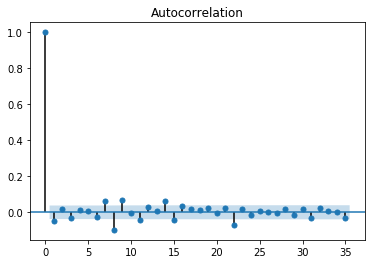

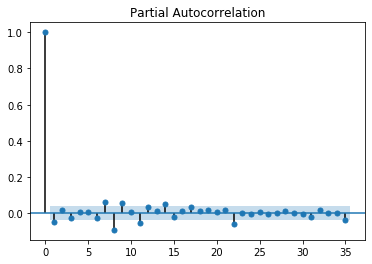

In [11]:
# fig, axs = plt.subplots(2)
# fig.suptitle('ACF and PACF')
plot_acf(aapl['return'].dropna())
plot_pacf(aapl['return'].dropna())
# axs = [fig1, fig2]
plt.show()

In [12]:
#At best it's an ARMA(1,1) model, although we will ignore that for now.

In [13]:
returns= aapl['return']

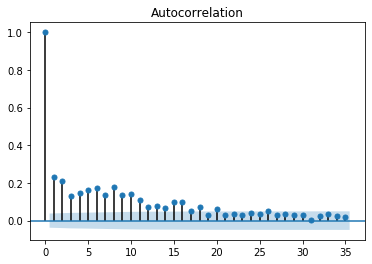

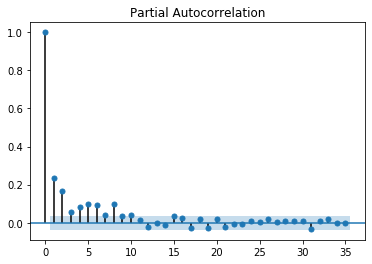

In [14]:
#Now we see the PACF/ ACF 

# fig, axs = plt.subplots(2)
# fig.suptitle('ACF and PACF')
plot_acf((returns**2).dropna())
plot_pacf((returns**2).dropna())
# axs = [fig1, fig2]
plt.show()

In [15]:
#Clear oscillatory pattern shows existence of variance persistence. Hencew we fit to a simple ARCH model to start with. 

In [16]:
model = arch_model(returns, p=1, q=1)

In [17]:
type(model)

arch.univariate.mean.ConstantMean

In [18]:
model.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: nan
Inequality constraints incompatible    (Exit mode 4)
            Current function value: nan
            Iterations: 1
            Function evaluations: 6
            Gradient evaluations: 1


C:\ProgramData\Anaconda3\lib\site-packages\arch\univariate\volatility.py:454: RuntimeWarning: invalid value encountered in less
  var_bounds[var_bounds[:, 0] < lower_bound, 0] = lower_bound
C:\ProgramData\Anaconda3\lib\site-packages\arch\univariate\volatility.py:455: RuntimeWarning: invalid value encountered in less
  var_bounds[var_bounds[:, 1] < min_upper_bound, 1] = min_upper_bound
C:\ProgramData\Anaconda3\lib\site-packages\arch\univariate\volatility.py:456: RuntimeWarning: invalid value encountered in greater
  var_bounds[var_bounds[:, 1] > upper_bound, 1] = upper_bound
C:\ProgramData\Anaconda3\lib\site-packages\arch\univariate\volatility.py:1015: RuntimeWarning: invalid value encountered in sign
  sresids = np.sign(resids)
C:\ProgramData\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\ProgramData\A

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                 return   R-squared:                         nan
Mean Model:             Constant Mean   Adj. R-squared:                    nan
Vol Model:                      GARCH   Log-Likelihood:                    nan
Distribution:                  Normal   AIC:                               nan
Method:            Maximum Likelihood   BIC:                               nan
                                        No. Observations:                 2713
Date:                Sun, Oct 11 2020   Df Residuals:                     2709
Time:                        19:49:26   Df Model:                            4
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu                nan        nan        nan        nan [    nan,    na

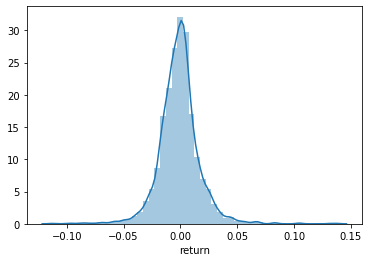

In [19]:
sns.distplot(returns)

In [20]:
aapl.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2713 entries, 2009-12-31 to 2020-10-09
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       2713 non-null   float64
 1   Low        2713 non-null   float64
 2   Open       2713 non-null   float64
 3   Close      2713 non-null   float64
 4   Volume     2713 non-null   float64
 5   Adj Close  2713 non-null   float64
 6   return     2712 non-null   float64
dtypes: float64(7)
memory usage: 169.6 KB


In [21]:
aapl.describe()

,High,Low,Open,Close,Volume,Adj Close,return
count,2713.000000,2713.000000,2713.000000,2713.000000,2.713000e+03,2713.000000,2712.000000
mean,32.248187,31.597803,31.923297,31.937344,2.900167e+08,30.298789,-0.001065
std,21.550639,20.964800,21.260707,21.277844,2.300341e+08,21.736877,0.017765
min,7.000000,6.794643,6.870357,6.858929,3.247000e+07,5.927071,-0.113157
25%,17.307142,16.901785,17.071428,17.140358,1.231640e+08,15.128744,-0.010326
50%,26.857500,26.352501,26.642500,26.532499,2.076628e+08,24.708641,-0.001000
75%,42.580002,41.689999,42.097500,42.122501,3.916836e+08,40.743973,0.006953
max,137.979996,130.529999,137.589996,134.179993,1.880998e+09,134.179993,0.137708


In [22]:
list(filter(lambda x: x.find('kur')+1, list(dir(returns))))

['kurt', 'kurtosis']

In [23]:
returns.skew()

0.34114879952441024

In [24]:
returns.kurtosis()

6.628398326101754

In [25]:
returns.kurt()

6.628398326101754

In [31]:
model2 = arch_model(returns.loc['2015-01-01':], p=1, q=1)
result=model2.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: -3930.156615120461
Iteration:      2,   Func. Count:     20,   Neg. LLF: -3931.9703988171964
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -3931.9703979707
            Iterations: 6
            Function evaluations: 20
            Gradient evaluations: 2


C:\ProgramData\Anaconda3\lib\site-packages\arch\univariate\base.py:293: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0003445. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  data_scale_warning.format(orig_scale, rescale), DataScaleWarning


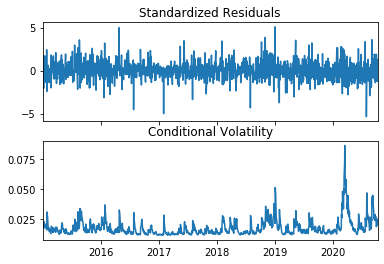

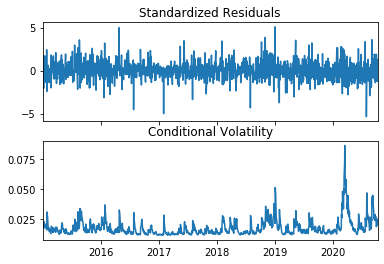

In [32]:
result.plot()

In [33]:
type(result)

arch.univariate.base.ARCHModelResult

In [34]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                 return   R-squared:                      -0.001
Mean Model:             Constant Mean   Adj. R-squared:                 -0.001
Vol Model:                      GARCH   Log-Likelihood:                3931.97
Distribution:                  Normal   AIC:                          -7855.94
Method:            Maximum Likelihood   BIC:                          -7834.81
                                        No. Observations:                 1454
Date:                Mon, Oct 12 2020   Df Residuals:                     1450
Time:                        14:11:30   Df Model:                            4
                                   Mean Model                                  
===============================================================================
                  coef    std err          t      P>|t|        95.0% Conf. Int.
-------------------------------------------------------------------------------
mu         -1.7715e-03  3.950e-04     -4.485  7.305e-06 [-2.546e-03,-9.973e-04]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      3.4451e-05  3.637e-06      9.472  2.741e-21 [2.732e-05,4.158e-05]
alpha[1]       0.2000  2.993e-02      6.682  2.356e-11     [  0.141,  0.259]
beta[1]        0.7000  2.818e-02     24.837 3.592e-136     [  0.645,  0.755]
============================================================================

Covariance estimator: robust
"""

In [37]:
print(dir(result))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_datetime', '_dep_name', '_dep_var', '_fit_indices', '_index', '_is_pandas', '_loglikelihood', '_model', '_names', '_nobs', '_optim_output', '_param_cov', '_params', '_r2', '_resid', '_volatility', 'aic', 'arch_lm_test', 'bic', 'conditional_volatility', 'conf_int', 'convergence_flag', 'cov_type', 'fit_start', 'fit_stop', 'forecast', 'hedgehog_plot', 'loglikelihood', 'model', 'nobs', 'num_params', 'optimization_result', 'param_cov', 'params', 'plot', 'pvalues', 'resid', 'rsquared', 'rsquared_adj', 'scale', 'std_err', 'std_resid', 'summary', 'tvalues']


In [40]:
result.resid.head()

Date
2015-01-02    0.011330
2015-01-05    0.030348
2015-01-06    0.001677
2015-01-07   -0.012153
2015-01-08   -0.035931
Name: resid, dtype: float64

In [43]:
type(result.forecast(horizon=1))

arch.univariate.base.ARCHModelForecast

In [44]:
print(dir(result.forecast(horizon=1)))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_mean', '_residual_variance', '_sim', '_variance', 'mean', 'residual_variance', 'simulations', 'variance']
